In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix, classification_report

In [21]:
df = pd.read_csv('train.csv')[['SalePrice','LotArea']]

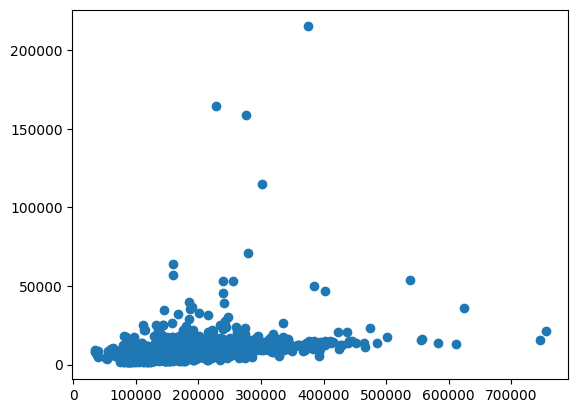

In [26]:
plt.scatter(df['SalePrice'], df['LotArea'])

In [32]:
clustering = KMeans(n_clusters=3)

y_pred= clustering.fit_predict(df[['SalePrice','LotArea']])


C:\Users\prabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [39]:
df['cluster'] = y_pred

In [40]:
df.head(4)

,SalePrice,LotArea,cluter,cluster
0,208500,8450,2,2
1,181500,9600,2,2
2,223500,11250,2,2
3,140000,9550,0,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


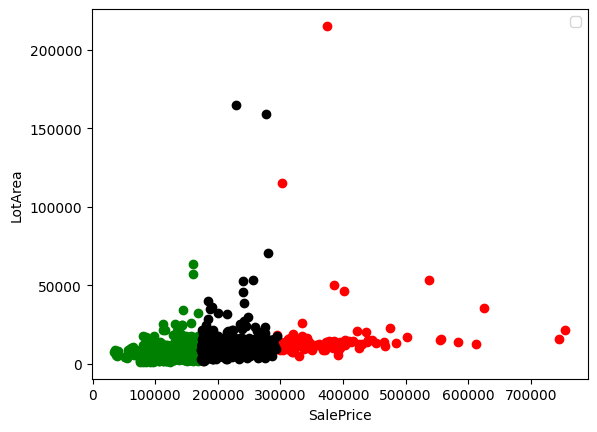

In [41]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
plt.scatter(df1['SalePrice'], df1['LotArea'], color ='green')
plt.scatter(df2['SalePrice'], df2['LotArea'], color ='red')
plt.scatter(df3['SalePrice'], df3['LotArea'], color ='black')

plt.xlabel('SalePrice')
plt.ylabel('LotArea')
plt.legend()

In [56]:
scaler = MinMaxScaler()
scaler.fit(df[['SalePrice']])
df['SalePrice'] = scaler.transform(df[['SalePrice']])
scaler.fit(df[['LotArea']])
df['LotArea'] = scaler.fit_transform(df[['LotArea']])

In [57]:
df.head(4)

,SalePrice,LotArea,cluter,cluster
0,0.241078,0.033420,2,2
1,0.203583,0.038795,2,2
2,0.261908,0.046507,2,2
3,0.145952,0.038561,0,0


In [58]:
clustering = KMeans(n_clusters=3)
y_pred= clustering.fit_predict(df[['SalePrice','LotArea']])

C:\Users\prabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [59]:
df['cluster1'] = y_pred

In [61]:
clustering.cluster_centers_

array([[0.46525113, 0.08435684],
       [0.13104422, 0.03364927],
       [0.25019292, 0.04775482]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


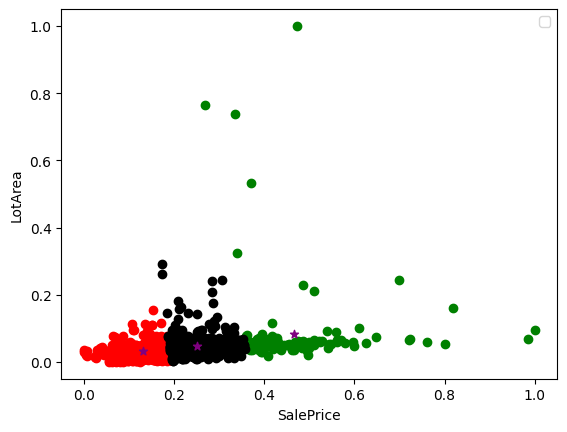

In [62]:
df4 = df[df.cluster1 == 0]
df5 = df[df.cluster1 == 1]
df6 = df[df.cluster1 == 2]
plt.scatter(df4['SalePrice'], df4['LotArea'], color ='green')
plt.scatter(df5['SalePrice'], df5['LotArea'], color ='red')
plt.scatter(df6['SalePrice'], df6['LotArea'], color ='black')
plt.scatter(clustering.cluster_centers_[:,0],clustering.cluster_centers_[:,1], color='purple', marker = '*')

plt.xlabel('SalePrice')
plt.ylabel('LotArea')
plt.legend()

In [63]:
k_rang = range(1,10)
sse = []
for k in k_rang:
    km = KMeans(n_clusters=k)
    km.fit(df[['SalePrice','LotArea']])
    sse.append(km.inertia_)

C:\Users\prabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\prabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\prabh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

In [64]:
sse

[20.932815281367,
 9.9499430759592,
 6.83376078349696,
 4.910980073276147,
 3.4685787931884136,
 2.68899596608893,
 2.2080105622408457,
 1.842002766788109,
 1.5272713652009728]

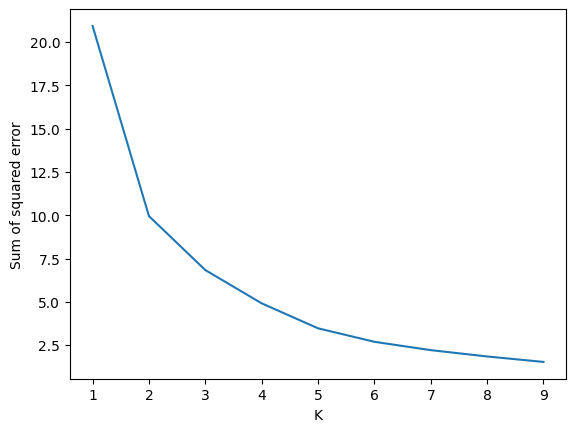

In [65]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rang, sse)